# Hollwood Releases Market Performace Report and analysis of last 25 years (1995-2020)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cufflinks as cf
from scipy import stats
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
%matplotlib inline
import plotly.express as px

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
AnnualTicketSales = pd.read_csv('AnnualTicketSales.csv')
HighestGrossers = pd.read_csv('HighestGrossers.csv')
PopularCreativeTypes = pd.read_csv('PopularCreativeTypes.csv')
TopDistributors = pd.read_csv('TopDistributors.csv')
TopGenres = pd.read_csv('TopGenres.csv')
TopGrossingRatings = pd.read_csv('TopGrossingRatings.csv')
TopGrossingSources = pd.read_csv('TopGrossingSources.csv')
TopProductionMethods = pd.read_csv('TopProductionMethods.csv')
WideReleasesCount = pd.read_csv('WideReleasesCount.csv')

In [4]:
AnnualTicketSales.head()


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [5]:
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace(',','')
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].str.replace('$','')
AnnualTicketSales['TICKETS SOLD'] = AnnualTicketSales['TICKETS SOLD'].str.replace(',','')
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',','')
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','')
AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].str.replace('$','')
AnnualTicketSales = AnnualTicketSales.drop('Unnamed: 5',axis=1)

<ipython-input-5-bc93de8143cb>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-5-bc93de8143cb>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-5-bc93de8143cb>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [6]:
AnnualTicketSales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [7]:
AnnualTicketSales['TOTAL BOX OFFICE'] = AnnualTicketSales['TOTAL BOX OFFICE'].astype(float)
AnnualTicketSales['TICKETS SOLD'] = AnnualTicketSales['TICKETS SOLD'].astype(float)
AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = AnnualTicketSales['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(float)
AnnualTicketSales['AVERAGE TICKET PRICE'] = AnnualTicketSales['AVERAGE TICKET PRICE'].astype(float)

In [8]:

px.bar(x='YEAR',y='TOTAL BOX OFFICE',data_frame=AnnualTicketSales)


In [9]:
px.line(x='YEAR',y='TOTAL BOX OFFICE',data_frame=AnnualTicketSales)

In [10]:
AnnualTicketSales['TOTAL BOX OFFICE'].mean()

8828496164.851852

In [11]:
AnnualTicketSales['TOTAL BOX OFFICE'].pct_change().mean()

0.12751132863795853

So basically the average growth rate of hollywood movie's total returns is 12.7%

Acoording to this growth, without covid, the hollywood movie's annual returns should have been in year 2020

In [12]:
AnnualTicketSales[AnnualTicketSales['YEAR'] == 2019]['TOTAL BOX OFFICE'] *1.127

2    1.268263e+10
Name: TOTAL BOX OFFICE, dtype: float64

and in year 2021 the total sales should have been

In [13]:
AnnualTicketSales[AnnualTicketSales['YEAR'] == 2019]['TOTAL BOX OFFICE'] *1.127 * 1.127

2    1.429333e+10
Name: TOTAL BOX OFFICE, dtype: float64

In [14]:
HighestGrossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


Cleaning the data

In [16]:
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace('$','')
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].str.replace(',','')
HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace('$','')
HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace('$','')

HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].str.replace(',','')
HighestGrossers['TICKETS SOLD'] = HighestGrossers['TICKETS SOLD'].str.replace(',','')
HighestGrossers['TICKETS SOLD'] = HighestGrossers['TICKETS SOLD'].astype(float)
HighestGrossers['TOTAL IN 2019 DOLLARS'] = HighestGrossers['TOTAL IN 2019 DOLLARS'].astype(float)
HighestGrossers['TOTAL FOR YEAR'] = HighestGrossers['TOTAL FOR YEAR'].astype(float)

<ipython-input-16-3abbab27c302>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-16-3abbab27c302>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-16-3abbab27c302>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [17]:
HighestGrossers.head(10)

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112.0,387522978.0,42306002.0
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255.0,634504608.0,69269062.0
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052.0,500207943.0,54607854.0
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081.0,865842808.0,94524324.0
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350.0,776153749.0,84732942.0
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455.0,430583644.0,47006948.0
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434.0,486166890.0,53074988.0
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375.0,636480273.0,69484746.0
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367.0,516050346.0,56337374.0
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247.0,650826473.0,71050925.0


In [18]:
HighestGrossers.tail(10)

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
17,2012,The Avengers,Adventure,PG-13,Walt Disney,623357910.0,717331462.0,78311295.0
18,2013,Iron Man 3,Adventure,PG-13,Walt Disney,408992272.0,460808016.0,50306552.0
19,2014,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,333055258.0,373413235.0,40765637.0
20,2015,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,742208942.0,806480887.0,88043765.0
21,2016,Finding Dory,Action,PG,Walt Disney,486295561.0,514967322.0,56219140.0
22,2017,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,517218368.0,528173936.0,57660910.0
23,2018,Black Panther,Action,PG-13,Walt Disney,700059566.0,703901821.0,76845177.0
24,2019,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000.0,858373002.0,93708843.0
25,2020,Bad Boys For Life,NaN,R,Sony Pictures,204417855.0,204417848.0,22316359.0
26,2021,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704.0,224226704.0,24478897.0


In [19]:
# Sale by Movie Inflation Adjusted

px.pie(HighestGrossers,values='TOTAL IN 2019 DOLLARS',title='Total Sales inflation Adjusted',names='MOVIE')

In [20]:
# Sale by Movie Inflation Adjusted

px.pie(HighestGrossers,values='TOTAL IN 2019 DOLLARS',title='Total Sales inflation Adjusted',names='DISTRIBUTOR')

In [21]:
# percentage of movies by rating
px.pie(HighestGrossers,names='MPAA RATING',values='TOTAL IN 2019 DOLLARS')

In [22]:
# Gross by distributor and Genre

HighestGrossers.groupby(['DISTRIBUTOR','GENRE'])['TICKETS SOLD'].sum().unstack().iplot(kind='bar')

In [23]:
# By rating

HighestGrossers.groupby(['MPAA RATING','GENRE'])['TOTAL IN 2019 DOLLARS'].sum().unstack().iplot(kind='bar')

In [24]:
# By rating

HighestGrossers.groupby(['DISTRIBUTOR','MPAA RATING'])['TOTAL IN 2019 DOLLARS'].sum().unstack().iplot(kind='bar')

Visualization of Popular Creative Types

In [25]:
PopularCreativeTypes = pd.read_csv('PopularCreativeTypes.csv')

In [26]:
PopularCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%


Cleaning the Data for visualization

In [27]:
PopularCreativeTypes['TOTAL GROSS'] = PopularCreativeTypes['TOTAL GROSS'].str.replace('$','')
PopularCreativeTypes['TOTAL GROSS'] = PopularCreativeTypes['TOTAL GROSS'].str.replace(',','')
PopularCreativeTypes['MOVIES'] = PopularCreativeTypes['MOVIES'].str.replace(',','')
PopularCreativeTypes['AVERAGE GROSS'] = PopularCreativeTypes['AVERAGE GROSS'].str.replace('$','')
PopularCreativeTypes['AVERAGE GROSS'] = PopularCreativeTypes['AVERAGE GROSS'].str.replace(',','')
PopularCreativeTypes['MARKET SHARE'] = PopularCreativeTypes['MARKET SHARE'].str.replace('%','')
PopularCreativeTypes['TOTAL GROSS'] = PopularCreativeTypes['TOTAL GROSS'].astype(float)
PopularCreativeTypes['MOVIES'] = PopularCreativeTypes['MOVIES'].astype(float)
PopularCreativeTypes['AVERAGE GROSS'] = PopularCreativeTypes['AVERAGE GROSS'].astype(float)
PopularCreativeTypes['MARKET SHARE'] = PopularCreativeTypes['MARKET SHARE'].astype(float)

<ipython-input-27-8f8473559802>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-27-8f8473559802>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [28]:
PopularCreativeTypes.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442.0,9.620373e+10,12927133.0,40.46
1,2.0,Kids Fiction,564.0,3.203554e+10,56800602.0,13.47
2,3.0,Science Fiction,724.0,2.992266e+10,41329642.0,12.59
3,4.0,Fantasy,759.0,2.172406e+10,28621953.0,9.14
4,5.0,Super Hero,129.0,2.027316e+10,157156263.0,8.53


In [29]:
px.pie(PopularCreativeTypes,names='CREATIVE TYPES',values='TOTAL GROSS',title='Share of different Creative Types')

In [30]:
px.bar(PopularCreativeTypes,x='CREATIVE TYPES',y='TOTAL GROSS',title='TOTAL GROSS Creative type wise')

In [31]:
px.pie(PopularCreativeTypes,values='AVERAGE GROSS',names='CREATIVE TYPES',title='% of Average Gross creative type wise')

In [32]:
px.bar(PopularCreativeTypes,y='AVERAGE GROSS',x='CREATIVE TYPES',title='Average Gross creative type wise')

In [33]:
px.pie(PopularCreativeTypes,values='MOVIES',names='CREATIVE TYPES',title='Number of movies released Creative type wise')

In [34]:
TopDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


Data cleaning

In [35]:
TopDistributors['TOTAL GROSS'] = TopDistributors['TOTAL GROSS'].str.replace('$','')
TopDistributors['TOTAL GROSS'] = TopDistributors['TOTAL GROSS'].str.replace(',','')
TopDistributors['TOTAL GROSS'] = TopDistributors['TOTAL GROSS'].astype(float)

TopDistributors['AVERAGE GROSS'] = TopDistributors['AVERAGE GROSS'].str.replace('$','')
TopDistributors['AVERAGE GROSS'] = TopDistributors['AVERAGE GROSS'].str.replace(',','')
TopDistributors['AVERAGE GROSS'] = TopDistributors['AVERAGE GROSS'].astype(float)

TopDistributors['MARKET SHARE'] = TopDistributors['MARKET SHARE'].str.replace('%','')
TopDistributors['MARKET SHARE'] = TopDistributors['MARKET SHARE'].astype(float)

<ipython-input-35-a69a447e5c86>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-35-a69a447e5c86>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [36]:
TopDistributors.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,4.047242e+10,68830654.0,17.02
1,2,Warner Bros.,824,3.626943e+10,44016293.0,15.25
2,3,Sony Pictures,747,2.911300e+10,38973229.0,12.24
3,4,Universal,535,2.808993e+10,52504547.0,11.81
4,5,20th Century Fox,525,2.585784e+10,49253028.0,10.88


In [37]:
px.pie(TopDistributors,names='DISTRIBUTORS',values='TOTAL GROSS',title='Distributor wise Total Gross')

In [39]:
px.pie(TopDistributors,names='DISTRIBUTORS',values='MARKET SHARE',title='Distributor wise Market Share')

In [40]:
TopProductionMethods.head()

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,"14,613","$179,637,201,848","$12,292,972",75.56%
1,2,Animation/Live Action,264,"$30,346,622,254","$114,949,327",12.76%
2,3,Digital Animation,365,"$23,920,180,508","$65,534,741",10.06%
3,4,Hand Animation,164,"$2,960,497,487","$18,051,814",1.25%
4,5,Stop-Motion Animation,37,"$676,490,120","$18,283,517",0.28%


In [42]:
px.bar(TopProductionMethods,x='PRODUCTION METHODS',y='TOTAL GROSS')

In [43]:
WideReleasesCount.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [45]:
WideReleasesCount.drop('Unnamed: 9',axis=1,inplace=True)

In [46]:
WideReleasesCount.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
0,2021,17,7,0,4,16,17,61,38
1,2020,5,3,1,3,9,13,34,23
2,2019,18,10,11,9,18,21,87,44
3,2018,19,10,11,10,16,20,86,58
4,2017,18,8,14,10,16,15,81,50


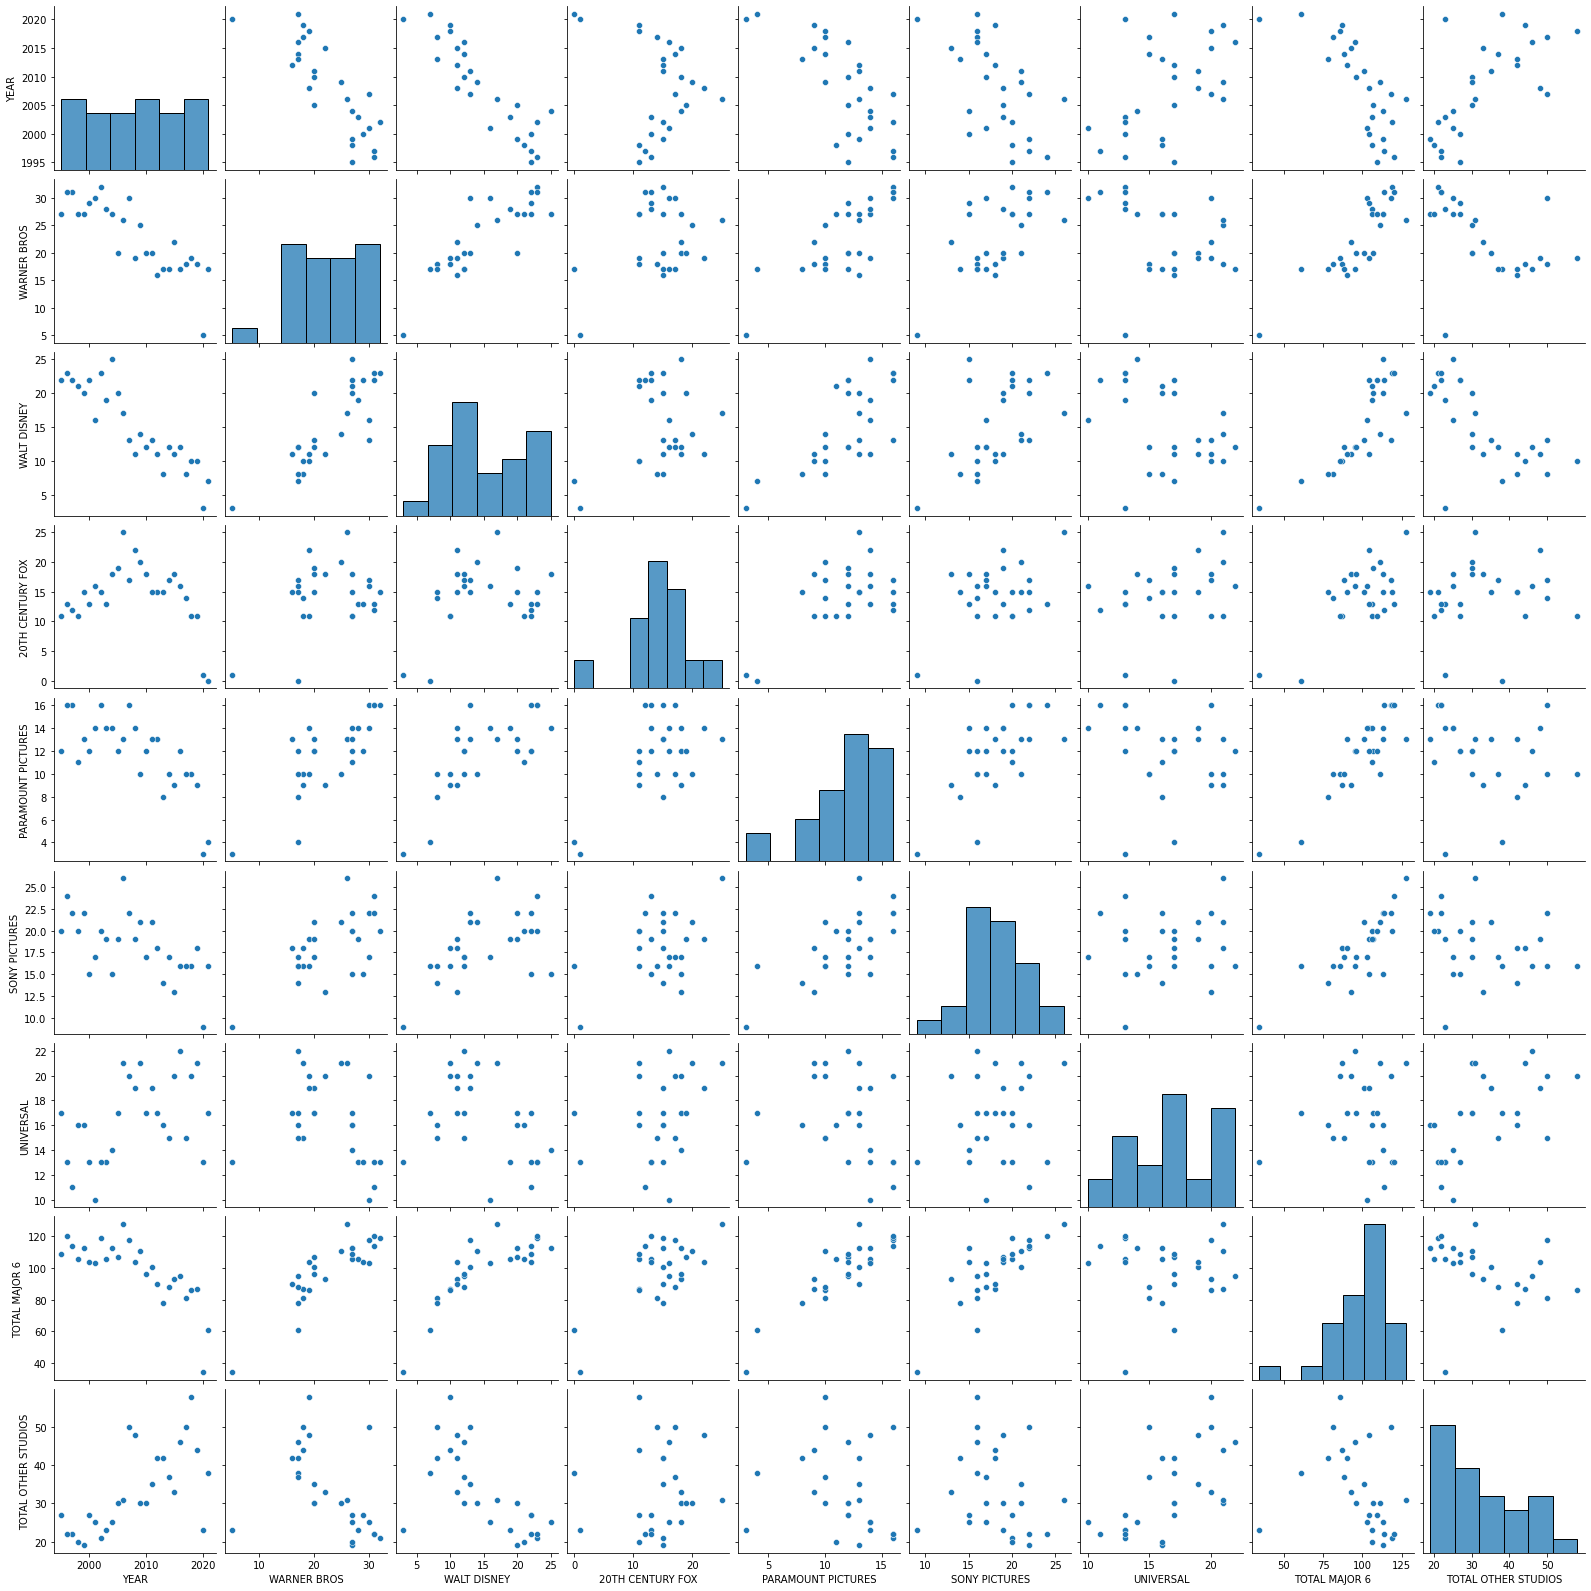

In [47]:
sns.pairplot(WideReleasesCount)